
# MLP - CIRAF 10 Dataset

In [16]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import os

In [2]:
#Extracting Data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
batch_size = 128
num_classes = 10
epochs = 50

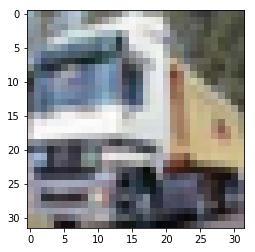

In [4]:
digit = x_train[1]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show()

In [5]:
#applying normalization between 0 and 1
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model 1

In [7]:
#Building the  Neural Network architecture 
#Model 1 

model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',
                         optimizer='sgd',
                         metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

#Validating Model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 322us/step - loss: 2

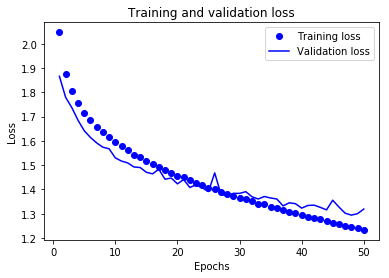

In [9]:
##plot test vs train


import os

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



# Model 2

In this model, am adding one more hidden layer with 512 nodes. Changing the optimizer to Adam and increasing epochs to 75 

In [10]:
epochs = 75

model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',
                         optimizer='adam', 
                         metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total para

{'val_loss': [1.7818924282073976, 1.6830781070709229, 1.6485945957183838, 1.6279459259033202, 1.5702053020477296, 1.5948447294235228, 1.5439111980438232, 1.545910891342163, 1.5112756616592407, 1.4998516777038575, 1.4898086990356445, 1.4620351356506347, 1.5060755710601808, 1.4516497928619385, 1.4710588039398194, 1.4442306705474854, 1.4603508670806884, 1.4493912340164186, 1.458855969619751, 1.4167212230682373, 1.4545310304641723, 1.4230437875747681, 1.426247603225708, 1.43236432762146, 1.4146961256027222, 1.411043038368225, 1.4097822067260741, 1.3990545337677003, 1.4108746599197388, 1.3887394187927247, 1.3974180416107178, 1.422294905090332, 1.417687328338623, 1.4075113744735719, 1.4000488914489746, 1.403061045074463, 1.3907808937072754, 1.392677604675293, 1.3748750217437744, 1.395563190460205, 1.399223752784729, 1.4020757623672486, 1.3847667697906494, 1.3999363916397094, 1.3811733415603638, 1.372129714012146, 1.3635571754455567, 1.3979281873703002, 1.398092261314392, 1.3741666646957398, 

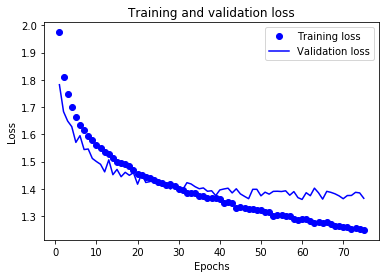

In [11]:
##plot test vs train

print(history.history)


import os

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



# Model 3 

In this model,ive increased the second hidden layer with 1024 neurons and droput changed to 0.1 

In [14]:

epochs = 75

model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',
                         optimizer='adam', 
                         metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total para

{'val_loss': [1.756217385482788, 1.7037962125778199, 1.6611197803497315, 1.6088443996429442, 1.623924517440796, 1.5876050699234008, 1.5352524194717407, 1.5241949647903443, 1.5566791612625122, 1.5293626045227051, 1.5303544208526612, 1.5128508296966552, 1.514099411392212, 1.5217770614624024, 1.4720823955535889, 1.508705738067627, 1.4563506074905395, 1.4657058280944824, 1.4716756820678711, 1.449183991241455, 1.4508750246047974, 1.4476039503097535, 1.4485914215087892, 1.4622637203216553, 1.4451707147598267, 1.4443270503997803, 1.4450100566864013, 1.4228560365676879, 1.4352934322357178, 1.4473672819137573, 1.413201121711731, 1.4149680551528931, 1.422063236618042, 1.4327812313079833, 1.4334594398498535, 1.3976604946136475, 1.4385583839416505, 1.405725085067749, 1.4037195293426514, 1.4299893255233764, 1.4256367881774903, 1.4101312173843383, 1.4147745079040528, 1.4034413372039796, 1.3965736186981201, 1.3931816013336182, 1.4108792371749879, 1.4064277332305908, 1.402779912185669, 1.3945294025421

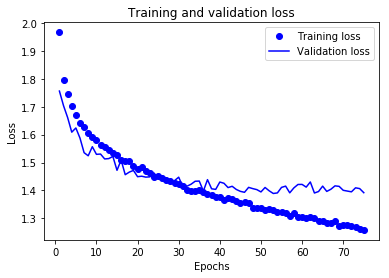

In [15]:
##plot test vs train

print(history.history)


import os

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


